# Monte-Carlo 학습

예제
* 환경(Environment) : 에이전트의 액션을 받아 상태변이를 일으키고, 보상을 줌 
    - 환경에 특별한 확률적 요소는 없음
    - 각 스텝마다 보상은 -1로 고정
* 에이전트(Agent) : 4방향 랜덤 정책을 이용해 움직임 
* 경험 쌓는 부분(1 Episode) : 에이전트가 환경과 상호작용하며 데이터를 축적 
* 학습하는 부분(Update) : 쌓인 경험을 통해 테이블을 업데이트

## Setting

### Library

In [113]:
import random

In [116]:
from utils.function_time import logging_time
from utils.visualization import value_visualize

## Environment

In [117]:
class GridWorld():
    def __init__(self): # 초기 위치 선정
        self.x=0
        self.y=0
    
    def step(self, a): # 핵심 함수 - 액션에 따른 상태 변이, 보상 정의, 종결 여부 판단
        # 4가지 action - 상하좌우
        if a==0:
            self.move_left()
        elif a==1:
            self.move_up()
        elif a==2:
            self.move_right()
        elif a==3:
            self.move_down()

        reward = -1 # 보상은 항상 -1
        done = self.is_done()
        return (self.x, self.y), reward, done

    def move_right(self): # Action에 따른 이동
        self.y += 1  
        if self.y > 3:
            self.y = 3
      
    def move_left(self): # Action에 따른 이동
        self.y -= 1
        if self.y < 0:
            self.y = 0
      
    def move_up(self): # Action에 따른 이동
        self.x -= 1
        if self.x < 0:
            self.x = 0
  
    def move_down(self): # Action에 따른 이동
        self.x += 1
        if self.x > 3:
            self.x = 3

    def is_done(self): # 에피소드가 끝났는지 판단
        if self.x == 3 and self.y == 3:
            return True
        else :
            return False

    def get_state(self): # 현재 위치 반환
        return (self.x, self.y)
      
    def reset(self): # 처음 상태로 되돌리기
        self.x = 0
        self.y = 0
        return (self.x, self.y)

## Agent

In [118]:
class Agent():
    def __init__(self):
        pass

    def select_action(self): # 랜덤하게 액션을 선택하는 정책
        coin = random.random()

        # uniform 확률 분포의 형태
        if coin < 0.25:
            action = 0
        elif coin < 0.5:
            action = 1
        elif coin < 0.75:
            action = 2
        else:
            action = 3
        return action

## 학습

In [122]:
@logging_time
def monte_carlo(episode):
    env = GridWorld()
    agent = Agent()
    data = [[0] * 4 for _ in range(4)] # 4x4 크기의 0으로 채워진 2차원 리스트 생성 = 테이블이며 value 값 저장
    gamma = 1.0 # 할인율이 1이므로 리턴값은 도착할 때까지의 이동횟수를 의미
    alpha = 0.0001

    for n in range(5000) : # 에피소드 수만큼 반복
        done = False
        history = []
        # 경험 쌓는 부분
        while not done:
            action = agent.select_action() # 정책에 따라 액션 선택 : 현재 정책은 랜덤 선택
            (x,y), reward, done = env.step(action) # 액션에 따른 상태 변이
            history.append((x,y,reward)) # 에피소드의 상태, 보상 정보 저장
        print("{} 번째 에피소드의 이동 횟수 : {}".format(n+1,len(history)))
        env.reset() # 에피소드가 끝나면 환경 초기화

        # 매 에피소드가 끝나고 바로 해당 데이터를 이용해 테이블을 업데이트
        cum_reward = 0 # 리턴값
        for transition in history[::-1]: # 방문했던 상태들을 뒤에서부터 보며 차례차례 리턴을 계산
            x, y, reward = transition
            data[x][y] = data[x][y] + alpha * (cum_reward - data[x][y]) # V(s) = V(s) + alpha * (G - V(s)) : 몬테카를로 방식
            cum_reward = reward + gamma * cum_reward # Gt = Rt + gamma * Gt+1 : 재귀적인 관계
        print("{} 번째 에피소드의 리턴값 : {}".format(n+1,cum_reward))

        # 학습 500번마다 한 번씩 Value 시각화
        if n % 500 == 0:
            value_visualize(n, data)
    return data

1 번째 에피소드의 이동 횟수 : 28
1 번째 에피소드의 리턴값 : -28.0


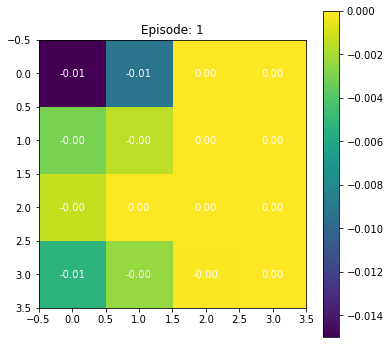

2 번째 에피소드의 이동 횟수 : 95
2 번째 에피소드의 리턴값 : -95.0
3 번째 에피소드의 이동 횟수 : 65
3 번째 에피소드의 리턴값 : -65.0
4 번째 에피소드의 이동 횟수 : 25
4 번째 에피소드의 리턴값 : -25.0
5 번째 에피소드의 이동 횟수 : 19
5 번째 에피소드의 리턴값 : -19.0
6 번째 에피소드의 이동 횟수 : 105
6 번째 에피소드의 리턴값 : -105.0
7 번째 에피소드의 이동 횟수 : 72
7 번째 에피소드의 리턴값 : -72.0
8 번째 에피소드의 이동 횟수 : 9
8 번째 에피소드의 리턴값 : -9.0
9 번째 에피소드의 이동 횟수 : 117
9 번째 에피소드의 리턴값 : -117.0
10 번째 에피소드의 이동 횟수 : 89
10 번째 에피소드의 리턴값 : -89.0
11 번째 에피소드의 이동 횟수 : 14
11 번째 에피소드의 리턴값 : -14.0
12 번째 에피소드의 이동 횟수 : 28
12 번째 에피소드의 리턴값 : -28.0
13 번째 에피소드의 이동 횟수 : 18
13 번째 에피소드의 리턴값 : -18.0
14 번째 에피소드의 이동 횟수 : 73
14 번째 에피소드의 리턴값 : -73.0
15 번째 에피소드의 이동 횟수 : 29
15 번째 에피소드의 리턴값 : -29.0
16 번째 에피소드의 이동 횟수 : 33
16 번째 에피소드의 리턴값 : -33.0
17 번째 에피소드의 이동 횟수 : 56
17 번째 에피소드의 리턴값 : -56.0
18 번째 에피소드의 이동 횟수 : 41
18 번째 에피소드의 리턴값 : -41.0
19 번째 에피소드의 이동 횟수 : 68
19 번째 에피소드의 리턴값 : -68.0
20 번째 에피소드의 이동 횟수 : 48
20 번째 에피소드의 리턴값 : -48.0
21 번째 에피소드의 이동 횟수 : 65
21 번째 에피소드의 리턴값 : -65.0
22 번째 에피소드의 이동 횟수 : 38
22 번째 에피소드의 리턴값 : -38.0
23 번째 에피소드의 이동 횟수 : 22
23 번

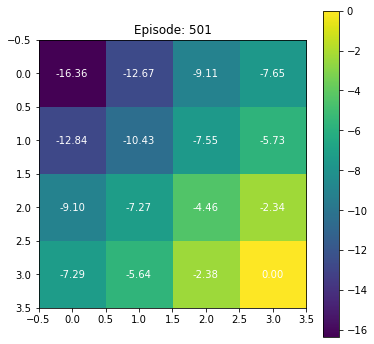

502 번째 에피소드의 이동 횟수 : 24
502 번째 에피소드의 리턴값 : -24.0
503 번째 에피소드의 이동 횟수 : 56
503 번째 에피소드의 리턴값 : -56.0
504 번째 에피소드의 이동 횟수 : 19
504 번째 에피소드의 리턴값 : -19.0
505 번째 에피소드의 이동 횟수 : 26
505 번째 에피소드의 리턴값 : -26.0
506 번째 에피소드의 이동 횟수 : 278
506 번째 에피소드의 리턴값 : -278.0
507 번째 에피소드의 이동 횟수 : 29
507 번째 에피소드의 리턴값 : -29.0
508 번째 에피소드의 이동 횟수 : 26
508 번째 에피소드의 리턴값 : -26.0
509 번째 에피소드의 이동 횟수 : 34
509 번째 에피소드의 리턴값 : -34.0
510 번째 에피소드의 이동 횟수 : 112
510 번째 에피소드의 리턴값 : -112.0
511 번째 에피소드의 이동 횟수 : 25
511 번째 에피소드의 리턴값 : -25.0
512 번째 에피소드의 이동 횟수 : 28
512 번째 에피소드의 리턴값 : -28.0
513 번째 에피소드의 이동 횟수 : 45
513 번째 에피소드의 리턴값 : -45.0
514 번째 에피소드의 이동 횟수 : 86
514 번째 에피소드의 리턴값 : -86.0
515 번째 에피소드의 이동 횟수 : 145
515 번째 에피소드의 리턴값 : -145.0
516 번째 에피소드의 이동 횟수 : 106
516 번째 에피소드의 리턴값 : -106.0
517 번째 에피소드의 이동 횟수 : 23
517 번째 에피소드의 리턴값 : -23.0
518 번째 에피소드의 이동 횟수 : 25
518 번째 에피소드의 리턴값 : -25.0
519 번째 에피소드의 이동 횟수 : 126
519 번째 에피소드의 리턴값 : -126.0
520 번째 에피소드의 이동 횟수 : 32
520 번째 에피소드의 리턴값 : -32.0
521 번째 에피소드의 이동 횟수 : 9
521 번째 에피소드의 리턴값 : -9.0
522 번째 에피소드의

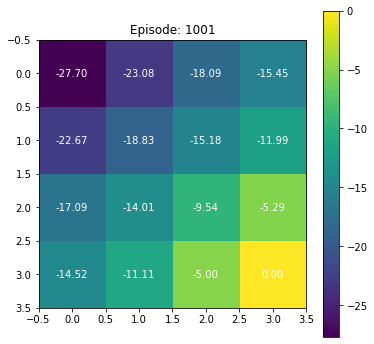

1002 번째 에피소드의 이동 횟수 : 64
1002 번째 에피소드의 리턴값 : -64.0
1003 번째 에피소드의 이동 횟수 : 160
1003 번째 에피소드의 리턴값 : -160.0
1004 번째 에피소드의 이동 횟수 : 45
1004 번째 에피소드의 리턴값 : -45.0
1005 번째 에피소드의 이동 횟수 : 139
1005 번째 에피소드의 리턴값 : -139.0
1006 번째 에피소드의 이동 횟수 : 85
1006 번째 에피소드의 리턴값 : -85.0
1007 번째 에피소드의 이동 횟수 : 18
1007 번째 에피소드의 리턴값 : -18.0
1008 번째 에피소드의 이동 횟수 : 102
1008 번째 에피소드의 리턴값 : -102.0
1009 번째 에피소드의 이동 횟수 : 71
1009 번째 에피소드의 리턴값 : -71.0
1010 번째 에피소드의 이동 횟수 : 134
1010 번째 에피소드의 리턴값 : -134.0
1011 번째 에피소드의 이동 횟수 : 11
1011 번째 에피소드의 리턴값 : -11.0
1012 번째 에피소드의 이동 횟수 : 26
1012 번째 에피소드의 리턴값 : -26.0
1013 번째 에피소드의 이동 횟수 : 63
1013 번째 에피소드의 리턴값 : -63.0
1014 번째 에피소드의 이동 횟수 : 94
1014 번째 에피소드의 리턴값 : -94.0
1015 번째 에피소드의 이동 횟수 : 12
1015 번째 에피소드의 리턴값 : -12.0
1016 번째 에피소드의 이동 횟수 : 35
1016 번째 에피소드의 리턴값 : -35.0
1017 번째 에피소드의 이동 횟수 : 70
1017 번째 에피소드의 리턴값 : -70.0
1018 번째 에피소드의 이동 횟수 : 21
1018 번째 에피소드의 리턴값 : -21.0
1019 번째 에피소드의 이동 횟수 : 61
1019 번째 에피소드의 리턴값 : -61.0
1020 번째 에피소드의 이동 횟수 : 100
1020 번째 에피소드의 리턴값 : -100.0
1021 번째 에피소드의 이동 횟수 :

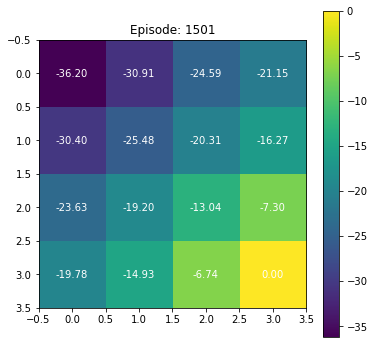

1502 번째 에피소드의 이동 횟수 : 342
1502 번째 에피소드의 리턴값 : -342.0
1503 번째 에피소드의 이동 횟수 : 38
1503 번째 에피소드의 리턴값 : -38.0
1504 번째 에피소드의 이동 횟수 : 12
1504 번째 에피소드의 리턴값 : -12.0
1505 번째 에피소드의 이동 횟수 : 39
1505 번째 에피소드의 리턴값 : -39.0
1506 번째 에피소드의 이동 횟수 : 11
1506 번째 에피소드의 리턴값 : -11.0
1507 번째 에피소드의 이동 횟수 : 63
1507 번째 에피소드의 리턴값 : -63.0
1508 번째 에피소드의 이동 횟수 : 82
1508 번째 에피소드의 리턴값 : -82.0
1509 번째 에피소드의 이동 횟수 : 75
1509 번째 에피소드의 리턴값 : -75.0
1510 번째 에피소드의 이동 횟수 : 24
1510 번째 에피소드의 리턴값 : -24.0
1511 번째 에피소드의 이동 횟수 : 22
1511 번째 에피소드의 리턴값 : -22.0
1512 번째 에피소드의 이동 횟수 : 318
1512 번째 에피소드의 리턴값 : -318.0
1513 번째 에피소드의 이동 횟수 : 35
1513 번째 에피소드의 리턴값 : -35.0
1514 번째 에피소드의 이동 횟수 : 19
1514 번째 에피소드의 리턴값 : -19.0
1515 번째 에피소드의 이동 횟수 : 118
1515 번째 에피소드의 리턴값 : -118.0
1516 번째 에피소드의 이동 횟수 : 301
1516 번째 에피소드의 리턴값 : -301.0
1517 번째 에피소드의 이동 횟수 : 25
1517 번째 에피소드의 리턴값 : -25.0
1518 번째 에피소드의 이동 횟수 : 57
1518 번째 에피소드의 리턴값 : -57.0
1519 번째 에피소드의 이동 횟수 : 13
1519 번째 에피소드의 리턴값 : -13.0
1520 번째 에피소드의 이동 횟수 : 9
1520 번째 에피소드의 리턴값 : -9.0
1521 번째 에피소드의 이동 횟수 : 200

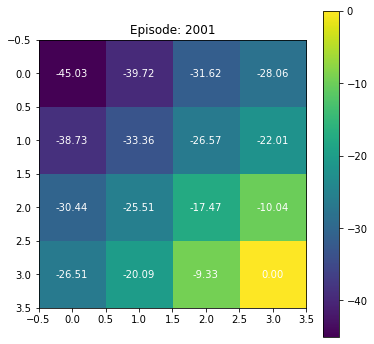

2002 번째 에피소드의 이동 횟수 : 261
2002 번째 에피소드의 리턴값 : -261.0
2003 번째 에피소드의 이동 횟수 : 168
2003 번째 에피소드의 리턴값 : -168.0
2004 번째 에피소드의 이동 횟수 : 19
2004 번째 에피소드의 리턴값 : -19.0
2005 번째 에피소드의 이동 횟수 : 72
2005 번째 에피소드의 리턴값 : -72.0
2006 번째 에피소드의 이동 횟수 : 103
2006 번째 에피소드의 리턴값 : -103.0
2007 번째 에피소드의 이동 횟수 : 25
2007 번째 에피소드의 리턴값 : -25.0
2008 번째 에피소드의 이동 횟수 : 213
2008 번째 에피소드의 리턴값 : -213.0
2009 번째 에피소드의 이동 횟수 : 24
2009 번째 에피소드의 리턴값 : -24.0
2010 번째 에피소드의 이동 횟수 : 36
2010 번째 에피소드의 리턴값 : -36.0
2011 번째 에피소드의 이동 횟수 : 107
2011 번째 에피소드의 리턴값 : -107.0
2012 번째 에피소드의 이동 횟수 : 7
2012 번째 에피소드의 리턴값 : -7.0
2013 번째 에피소드의 이동 횟수 : 12
2013 번째 에피소드의 리턴값 : -12.0
2014 번째 에피소드의 이동 횟수 : 238
2014 번째 에피소드의 리턴값 : -238.0
2015 번째 에피소드의 이동 횟수 : 121
2015 번째 에피소드의 리턴값 : -121.0
2016 번째 에피소드의 이동 횟수 : 123
2016 번째 에피소드의 리턴값 : -123.0
2017 번째 에피소드의 이동 횟수 : 15
2017 번째 에피소드의 리턴값 : -15.0
2018 번째 에피소드의 이동 횟수 : 8
2018 번째 에피소드의 리턴값 : -8.0
2019 번째 에피소드의 이동 횟수 : 111
2019 번째 에피소드의 리턴값 : -111.0
2020 번째 에피소드의 이동 횟수 : 36
2020 번째 에피소드의 리턴값 : -36.0
2021 번째 에피소드의 이동 

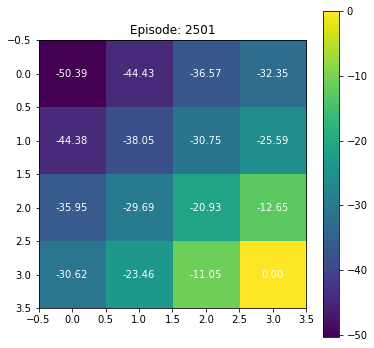

2502 번째 에피소드의 이동 횟수 : 57
2502 번째 에피소드의 리턴값 : -57.0
2503 번째 에피소드의 이동 횟수 : 52
2503 번째 에피소드의 리턴값 : -52.0
2504 번째 에피소드의 이동 횟수 : 13
2504 번째 에피소드의 리턴값 : -13.0
2505 번째 에피소드의 이동 횟수 : 28
2505 번째 에피소드의 리턴값 : -28.0
2506 번째 에피소드의 이동 횟수 : 70
2506 번째 에피소드의 리턴값 : -70.0
2507 번째 에피소드의 이동 횟수 : 24
2507 번째 에피소드의 리턴값 : -24.0
2508 번째 에피소드의 이동 횟수 : 125
2508 번째 에피소드의 리턴값 : -125.0
2509 번째 에피소드의 이동 횟수 : 24
2509 번째 에피소드의 리턴값 : -24.0
2510 번째 에피소드의 이동 횟수 : 26
2510 번째 에피소드의 리턴값 : -26.0
2511 번째 에피소드의 이동 횟수 : 68
2511 번째 에피소드의 리턴값 : -68.0
2512 번째 에피소드의 이동 횟수 : 46
2512 번째 에피소드의 리턴값 : -46.0
2513 번째 에피소드의 이동 횟수 : 29
2513 번째 에피소드의 리턴값 : -29.0
2514 번째 에피소드의 이동 횟수 : 11
2514 번째 에피소드의 리턴값 : -11.0
2515 번째 에피소드의 이동 횟수 : 84
2515 번째 에피소드의 리턴값 : -84.0
2516 번째 에피소드의 이동 횟수 : 103
2516 번째 에피소드의 리턴값 : -103.0
2517 번째 에피소드의 이동 횟수 : 14
2517 번째 에피소드의 리턴값 : -14.0
2518 번째 에피소드의 이동 횟수 : 57
2518 번째 에피소드의 리턴값 : -57.0
2519 번째 에피소드의 이동 횟수 : 77
2519 번째 에피소드의 리턴값 : -77.0
2520 번째 에피소드의 이동 횟수 : 35
2520 번째 에피소드의 리턴값 : -35.0
2521 번째 에피소드의 이동 횟수 : 8
252

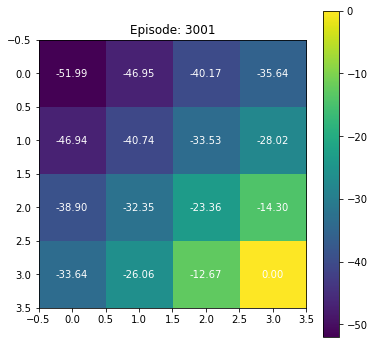

3002 번째 에피소드의 이동 횟수 : 89
3002 번째 에피소드의 리턴값 : -89.0
3003 번째 에피소드의 이동 횟수 : 170
3003 번째 에피소드의 리턴값 : -170.0
3004 번째 에피소드의 이동 횟수 : 11
3004 번째 에피소드의 리턴값 : -11.0
3005 번째 에피소드의 이동 횟수 : 48
3005 번째 에피소드의 리턴값 : -48.0
3006 번째 에피소드의 이동 횟수 : 67
3006 번째 에피소드의 리턴값 : -67.0
3007 번째 에피소드의 이동 횟수 : 261
3007 번째 에피소드의 리턴값 : -261.0
3008 번째 에피소드의 이동 횟수 : 94
3008 번째 에피소드의 리턴값 : -94.0
3009 번째 에피소드의 이동 횟수 : 56
3009 번째 에피소드의 리턴값 : -56.0
3010 번째 에피소드의 이동 횟수 : 33
3010 번째 에피소드의 리턴값 : -33.0
3011 번째 에피소드의 이동 횟수 : 31
3011 번째 에피소드의 리턴값 : -31.0
3012 번째 에피소드의 이동 횟수 : 40
3012 번째 에피소드의 리턴값 : -40.0
3013 번째 에피소드의 이동 횟수 : 44
3013 번째 에피소드의 리턴값 : -44.0
3014 번째 에피소드의 이동 횟수 : 115
3014 번째 에피소드의 리턴값 : -115.0
3015 번째 에피소드의 이동 횟수 : 22
3015 번째 에피소드의 리턴값 : -22.0
3016 번째 에피소드의 이동 횟수 : 159
3016 번째 에피소드의 리턴값 : -159.0
3017 번째 에피소드의 이동 횟수 : 124
3017 번째 에피소드의 리턴값 : -124.0
3018 번째 에피소드의 이동 횟수 : 20
3018 번째 에피소드의 리턴값 : -20.0
3019 번째 에피소드의 이동 횟수 : 22
3019 번째 에피소드의 리턴값 : -22.0
3020 번째 에피소드의 이동 횟수 : 53
3020 번째 에피소드의 리턴값 : -53.0
3021 번째 에피소드의 이동 횟수 :

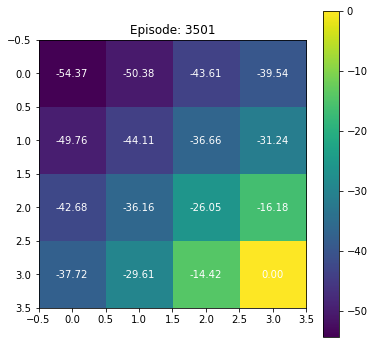

3502 번째 에피소드의 이동 횟수 : 58
3502 번째 에피소드의 리턴값 : -58.0
3503 번째 에피소드의 이동 횟수 : 12
3503 번째 에피소드의 리턴값 : -12.0
3504 번째 에피소드의 이동 횟수 : 57
3504 번째 에피소드의 리턴값 : -57.0
3505 번째 에피소드의 이동 횟수 : 47
3505 번째 에피소드의 리턴값 : -47.0
3506 번째 에피소드의 이동 횟수 : 75
3506 번째 에피소드의 리턴값 : -75.0
3507 번째 에피소드의 이동 횟수 : 37
3507 번째 에피소드의 리턴값 : -37.0
3508 번째 에피소드의 이동 횟수 : 15
3508 번째 에피소드의 리턴값 : -15.0
3509 번째 에피소드의 이동 횟수 : 17
3509 번째 에피소드의 리턴값 : -17.0
3510 번째 에피소드의 이동 횟수 : 35
3510 번째 에피소드의 리턴값 : -35.0
3511 번째 에피소드의 이동 횟수 : 76
3511 번째 에피소드의 리턴값 : -76.0
3512 번째 에피소드의 이동 횟수 : 16
3512 번째 에피소드의 리턴값 : -16.0
3513 번째 에피소드의 이동 횟수 : 34
3513 번째 에피소드의 리턴값 : -34.0
3514 번째 에피소드의 이동 횟수 : 68
3514 번째 에피소드의 리턴값 : -68.0
3515 번째 에피소드의 이동 횟수 : 19
3515 번째 에피소드의 리턴값 : -19.0
3516 번째 에피소드의 이동 횟수 : 111
3516 번째 에피소드의 리턴값 : -111.0
3517 번째 에피소드의 이동 횟수 : 229
3517 번째 에피소드의 리턴값 : -229.0
3518 번째 에피소드의 이동 횟수 : 21
3518 번째 에피소드의 리턴값 : -21.0
3519 번째 에피소드의 이동 횟수 : 22
3519 번째 에피소드의 리턴값 : -22.0
3520 번째 에피소드의 이동 횟수 : 82
3520 번째 에피소드의 리턴값 : -82.0
3521 번째 에피소드의 이동 횟수 : 53
35

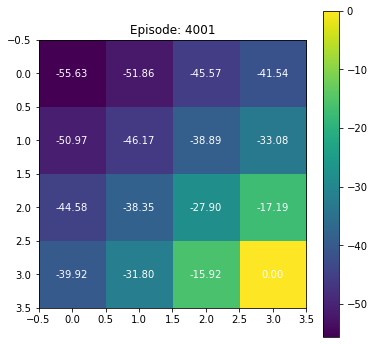

4002 번째 에피소드의 이동 횟수 : 164
4002 번째 에피소드의 리턴값 : -164.0
4003 번째 에피소드의 이동 횟수 : 40
4003 번째 에피소드의 리턴값 : -40.0
4004 번째 에피소드의 이동 횟수 : 90
4004 번째 에피소드의 리턴값 : -90.0
4005 번째 에피소드의 이동 횟수 : 114
4005 번째 에피소드의 리턴값 : -114.0
4006 번째 에피소드의 이동 횟수 : 105
4006 번째 에피소드의 리턴값 : -105.0
4007 번째 에피소드의 이동 횟수 : 19
4007 번째 에피소드의 리턴값 : -19.0
4008 번째 에피소드의 이동 횟수 : 37
4008 번째 에피소드의 리턴값 : -37.0
4009 번째 에피소드의 이동 횟수 : 100
4009 번째 에피소드의 리턴값 : -100.0
4010 번째 에피소드의 이동 횟수 : 70
4010 번째 에피소드의 리턴값 : -70.0
4011 번째 에피소드의 이동 횟수 : 78
4011 번째 에피소드의 리턴값 : -78.0
4012 번째 에피소드의 이동 횟수 : 43
4012 번째 에피소드의 리턴값 : -43.0
4013 번째 에피소드의 이동 횟수 : 61
4013 번째 에피소드의 리턴값 : -61.0
4014 번째 에피소드의 이동 횟수 : 43
4014 번째 에피소드의 리턴값 : -43.0
4015 번째 에피소드의 이동 횟수 : 95
4015 번째 에피소드의 리턴값 : -95.0
4016 번째 에피소드의 이동 횟수 : 18
4016 번째 에피소드의 리턴값 : -18.0
4017 번째 에피소드의 이동 횟수 : 50
4017 번째 에피소드의 리턴값 : -50.0
4018 번째 에피소드의 이동 횟수 : 90
4018 번째 에피소드의 리턴값 : -90.0
4019 번째 에피소드의 이동 횟수 : 78
4019 번째 에피소드의 리턴값 : -78.0
4020 번째 에피소드의 이동 횟수 : 23
4020 번째 에피소드의 리턴값 : -23.0
4021 번째 에피소드의 이동 횟수 : 2

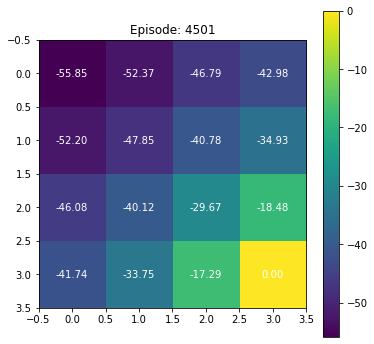

4502 번째 에피소드의 이동 횟수 : 16
4502 번째 에피소드의 리턴값 : -16.0
4503 번째 에피소드의 이동 횟수 : 74
4503 번째 에피소드의 리턴값 : -74.0
4504 번째 에피소드의 이동 횟수 : 17
4504 번째 에피소드의 리턴값 : -17.0
4505 번째 에피소드의 이동 횟수 : 153
4505 번째 에피소드의 리턴값 : -153.0
4506 번째 에피소드의 이동 횟수 : 49
4506 번째 에피소드의 리턴값 : -49.0
4507 번째 에피소드의 이동 횟수 : 128
4507 번째 에피소드의 리턴값 : -128.0
4508 번째 에피소드의 이동 횟수 : 85
4508 번째 에피소드의 리턴값 : -85.0
4509 번째 에피소드의 이동 횟수 : 45
4509 번째 에피소드의 리턴값 : -45.0
4510 번째 에피소드의 이동 횟수 : 16
4510 번째 에피소드의 리턴값 : -16.0
4511 번째 에피소드의 이동 횟수 : 51
4511 번째 에피소드의 리턴값 : -51.0
4512 번째 에피소드의 이동 횟수 : 100
4512 번째 에피소드의 리턴값 : -100.0
4513 번째 에피소드의 이동 횟수 : 14
4513 번째 에피소드의 리턴값 : -14.0
4514 번째 에피소드의 이동 횟수 : 266
4514 번째 에피소드의 리턴값 : -266.0
4515 번째 에피소드의 이동 횟수 : 27
4515 번째 에피소드의 리턴값 : -27.0
4516 번째 에피소드의 이동 횟수 : 64
4516 번째 에피소드의 리턴값 : -64.0
4517 번째 에피소드의 이동 횟수 : 12
4517 번째 에피소드의 리턴값 : -12.0
4518 번째 에피소드의 이동 횟수 : 98
4518 번째 에피소드의 리턴값 : -98.0
4519 번째 에피소드의 이동 횟수 : 37
4519 번째 에피소드의 리턴값 : -37.0
4520 번째 에피소드의 이동 횟수 : 26
4520 번째 에피소드의 리턴값 : -26.0
4521 번째 에피소드의 이동 횟수 : 1

In [123]:
episode = 5000 # 총 5000번의 에피소드 진행
MC_result = monte_carlo(episode)

[-55.42496965002638, -52.73060214969963, -47.23883511312737, -43.66817474435302]
[-52.1991057007804, -48.28105325862612, -41.466156585881286, -35.878477349193304]
[-45.854903030663266, -40.43995012438546, -30.697258995062786, -19.380674142115144]
[-42.537760681760915, -34.66567534638546, -18.285507068850716, 0.0]


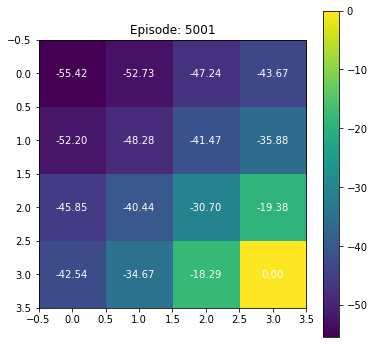

In [124]:
# 학습이 끝나고 난 후 데이터를 출력해보기 위한 코드
for row in MC_result:
    print(row)
value_visualize(episode, MC_result)